# Indian Human Image Classification B21

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from numpy import save
import numpy as np
import matplotlib
import numpy as np 
import random
import cv2
import os

# Cropping and filtering Human Images

In [2]:
face_cascade = cv2.CascadeClassifier('/home/saksham/Desktop/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/saksham/Desktop/opencv-master/data/haarcascades/haarcascade_eye.xml')


In [6]:
path_to_data = "C:/Users/Dell/Desktop/cropped/cropped"
path_to_cr_data = "C:/Users/Dell/Desktop/cropped"

In [7]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if not img is None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

In [8]:
img_dirs=[path_to_data]

In [9]:
img_dirs

['C:/Users/Dell/Desktop/cropped/cropped']

In [10]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [94]:
cropped_image_dirs = []
dictitems = {}
for img_dir in img_dirs:
    count = 1
    img_name = img_dir.split('/')[-1]
    dictitems[img_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + img_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = img_name + str(count) + ".jpeg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            dictitems[img_name].append(cropped_file_path)
            count += 1

# Training the model

In [4]:
image_size=64
dir = "C:/Users/Dell/Desktop/cropped/cropped"  
catagories = ["foreigners" , "indians"]
train_data = []
for categ in catagories:
 print(categ) 
 try:
     path = os.path.join(dir , categ)  
     class_name = catagories.index(categ)
     for img in os.listdir(path):
          img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array , (image_size , image_size))
          train_data.append([new_array , class_name])
 except Exception as e:
     pass

foreigners
indians


In [5]:
random.shuffle(train_data)
# print(train_data[1][0])
x_train = np.zeros((len(train_data),64,64,3))
y_train = np.ndarray((len(train_data),) , int)
for i in range(len(train_data)):
    x_train[i]=train_data[i][0]
    y_train[i]=train_data[i][1]

In [6]:
x_train = x_train/255
save('x_train.npy' , x_train)

In [7]:
save('y_train.npy' , y_train)

In [8]:
x_train.shape

(2731, 64, 64, 3)

In [9]:
y_train.shape

(2731,)

In [10]:
dir_test = "C:/Users/Dell/Desktop/cropped/cropped/test"
catagorie = ["foreigners" , "indians"]
test_data = []
for c in catagorie:
 try:
     path_test = os.path.join(dir_test , c)  
     class_name_test = catagorie.index(c)
     for img_test in os.listdir(path_test):
          img_array_test = cv2.imread(os.path.join(path_test, img_test) , cv2.IMREAD_COLOR)
          new_array_test = cv2.resize(img_array_test , (image_size , image_size))
          test_data.append([new_array_test , class_name_test])
 except Exception as e_test:
     pass

random.shuffle(test_data)
x_test = np.zeros((len(test_data),64,64,3))
y_test = np.ndarray((len(test_data),) , int)
for i in range(len(test_data)):
    x_test[i]=test_data[i][0]
    y_test[i]=test_data[i][1]
x_test = x_test/255


In [11]:
save('x_test.npy' , x_test)
save('y_test.npy' , y_test)

In [13]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16 , (3,3) ,activation='relu', input_shape=(64,64,3)) ,
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D((2,2)),

                             tf.keras.layers.Conv2D(32,(3,3) ,activation='relu' ),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D((2,2)),
                           

                             tf.keras.layers.Conv2D(64 , (3,3) , activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128 , activation='relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(1 , activation='sigmoid')])

In [14]:
x_train.shape

(2731, 64, 64, 3)

In [15]:
x_test.shape

(462, 64, 64, 3)

In [16]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [17]:
history=model.fit(x_train,y_train , epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
86/86 [==============================] - 18s 160ms/step - loss: 0.6433 - accuracy: 0.7054 - val_loss: 0.7962 - val_accuracy: 0.5325
Epoch 2/30
86/86 [==============================] - 12s 134ms/step - loss: 0.3215 - accuracy: 0.8604 - val_loss: 1.3203 - val_accuracy: 0.5325
Epoch 3/30
86/86 [==============================] - 11s 132ms/step - loss: 0.2233 - accuracy: 0.9125 - val_loss: 0.9873 - val_accuracy: 0.5325
Epoch 4/30
86/86 [==============================] - 11s 127ms/step - loss: 0.1669 - accuracy: 0.9334 - val_loss: 1.3137 - val_accuracy: 0.5325
Epoch 5/30
86/86 [==============================] - 12s 137ms/step - loss: 0.1232 - accuracy: 0.9529 - val_loss: 0.9008 - val_accuracy: 0.6840
Epoch 6/30
86/86 [==============================] - 11s 132ms/step - loss: 0.0765 - accuracy: 0.9733 - val_loss: 0.8808 - val_accuracy: 0.7294
Epoch 7/30
86/86 [==============================] - 11s 127ms/step - loss: 0.1109 - accuracy: 0.9596 - val_loss: 0.5897 - val_accuracy: 0.8009

# Model summary and analysis

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

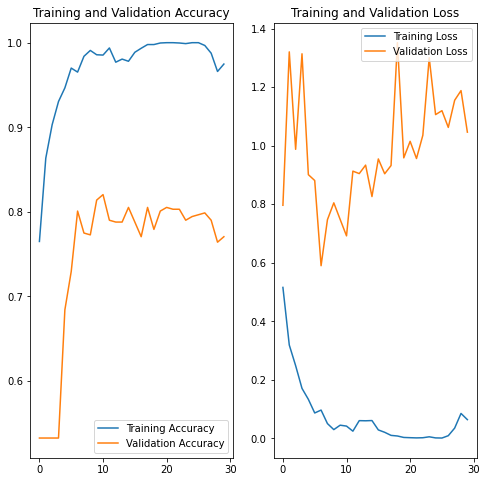

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
image_url = "https://m.economictimes.com/thumb/msid-72033478,width-1200,height-900,resizemode-4,imgsize-222096/sachin-tendulkar.jpg"
image_path = tf.keras.utils.get_file('sachin', origin=image_url)



122880/118205 [===============================] - 0s 1us/step


In [24]:
img = keras.preprocessing.image.load_img(
    image_path)
img = keras.preprocessing.image.load_img(
    image_path, target_size=(64, 64)
)


In [25]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)



In [26]:
predictions = model.predict(img_array)

In [27]:
score = tf.nn.softmax(predictions[0])

This image most likely belongs to indians with a 100.00 percent confidence.


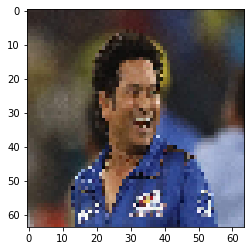

In [28]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categ, 100 * np.max(score))
)
plt.imshow(img)

In [29]:
print(categ)

indians
